In [4]:
import numpy as np
import pandas as pd
import os
base_skin_dir = '../src/data'
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [6]:
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
#tile_df = tile_df.sample(10001)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df['localization_code'] = pd.Categorical(tile_df['localization']).codes
tile_df['sex'] = pd.Categorical(tile_df['sex']).codes

tile_df.columns


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'cell_type', 'cell_type_idx', 'localization_code'],
      dtype='object')

In [7]:
tile_df.age.fillna(tile_df.age.median(),inplace=True)

In [8]:
plot_df = tile_df.iloc[:, [4, 5, 8, 9]]
data_train_x = tile_df.iloc[:, [4]]
data_train_y = tile_df.iloc[:,8]

In [9]:
data_train_x.isnull().sum()

age    0
dtype: int64

In [7]:
#data_train_x['age'].value_counts()
#data_train_x['sex'].value_counts()
#data_train_x['localization'].value_counts()
1

1

In [8]:
y = tile_df.cell_type_idx

from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(data_train_x, data_train_y, test_size=0.25, random_state = 42)

#x_train_add = np.asarray([x_train_o['localization'], x_train_o['sex'], x_train_o['age']])
#x_test_add = np.asarray([x_test_o['localization'], x_test_o['sex'], x_test_o['age']])

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [11]:
clf.fit(x_train_o, y_train)
y_pred = clf.predict(x_test_o)

Iteration 1, loss = 2.36271835
Iteration 2, loss = 2.11628547
Iteration 3, loss = 2.09486614
Iteration 4, loss = 2.07351172
Iteration 5, loss = 2.05240498
Iteration 6, loss = 2.03857704
Iteration 7, loss = 2.01361270
Iteration 8, loss = 1.99819056
Iteration 9, loss = 1.96990722
Iteration 10, loss = 1.95368301
Iteration 11, loss = 1.93329642
Iteration 12, loss = 1.90797345
Iteration 13, loss = 1.91327730
Iteration 14, loss = 1.87699115
Iteration 15, loss = 1.87785400
Iteration 16, loss = 1.90542237
Iteration 17, loss = 1.85624298
Iteration 18, loss = 1.83642368
Iteration 19, loss = 1.81355584
Iteration 20, loss = 1.80892094
Iteration 21, loss = 1.80410441
Iteration 22, loss = 1.78911208
Iteration 23, loss = 1.77559709
Iteration 24, loss = 1.78237421
Iteration 25, loss = 1.75379355
Iteration 26, loss = 1.75530457
Iteration 27, loss = 1.74764104
Iteration 28, loss = 1.72225771
Iteration 29, loss = 1.74073983
Iteration 30, loss = 1.71778936
Iteration 31, loss = 1.71833940
Iteration 32, los

In [12]:
clf.score(x_test_o, y_test)

0.6038338658146964

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic_train_dataset.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

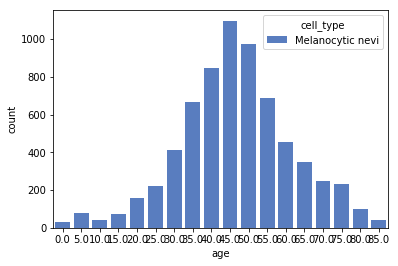

In [19]:
sns.countplot(x='age', hue='cell_type', data=tile_df[tile_df['cell_type']=='Melanocytic nevi'], palette="muted")

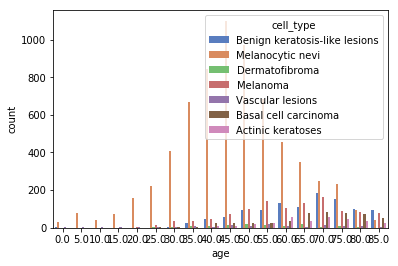

In [10]:
sns.countplot(x='age', hue='cell_type', data=tile_df, palette="muted")

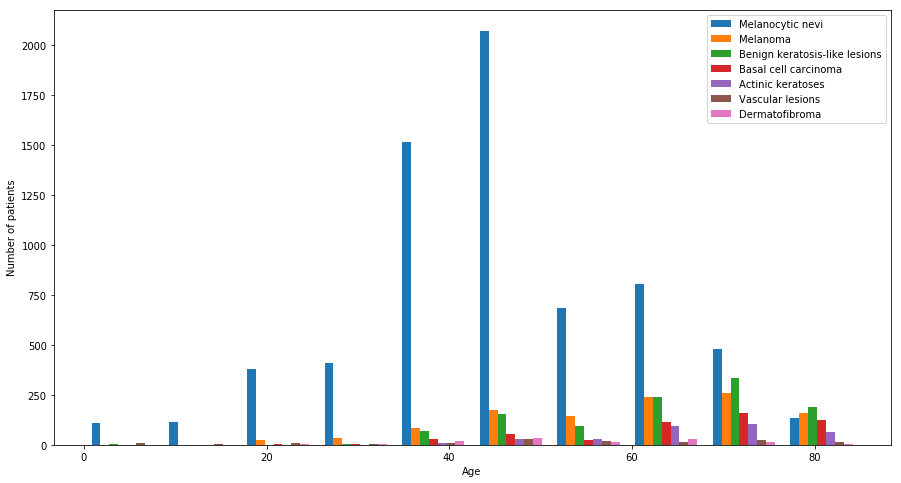

In [12]:
figure = plt.figure(figsize=(15,8))
plt.hist([
         tile_df[tile_df['cell_type']=='Melanocytic nevi']['age'],
         tile_df[tile_df['cell_type']=='Melanoma']['age'],
         tile_df[tile_df['cell_type']=='Benign keratosis-like lesions']['age'],
         tile_df[tile_df['cell_type']=='Basal cell carcinoma']['age'],
         tile_df[tile_df['cell_type']=='Actinic keratoses']['age'],
         tile_df[tile_df['cell_type']=='Vascular lesions']['age'],
         tile_df[tile_df['cell_type']=='Dermatofibroma']['age']], 
         bins = 10,label = ['Melanocytic nevi','Melanoma', 'Benign keratosis-like lesions', 'Basal cell carcinoma', 'Actinic keratoses', 'Vascular lesions', 'Dermatofibroma'])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend()

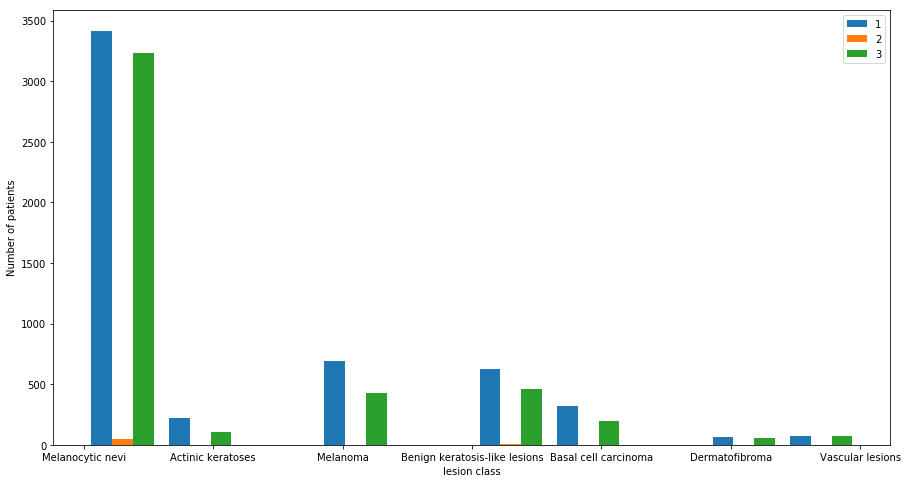

In [15]:
figure = plt.figure(figsize=(15,8))
plt.hist([
          tile_df[tile_df['sex']==1 ]['cell_type'],
         tile_df[tile_df['sex']== 2 ]['cell_type'],
         tile_df[tile_df['sex']== 0]['cell_type']], 
         bins = 10,label = ['1','2', '3', '4', '5', '6', '7'])
plt.xlabel('lesion class')
plt.ylabel('Number of patients')
plt.legend()

In [26]:
tile_df['sex'].value_counts()
tile_df['age'].value_counts()
tile_df['localization'].value_counts()

2     2190
9     2074
12    1401
14    1116
0     1021
5      743
3      406
6      319
13     234
10     168
11     128
8       89
4       56
7       48
1        7
Name: localization, dtype: int64

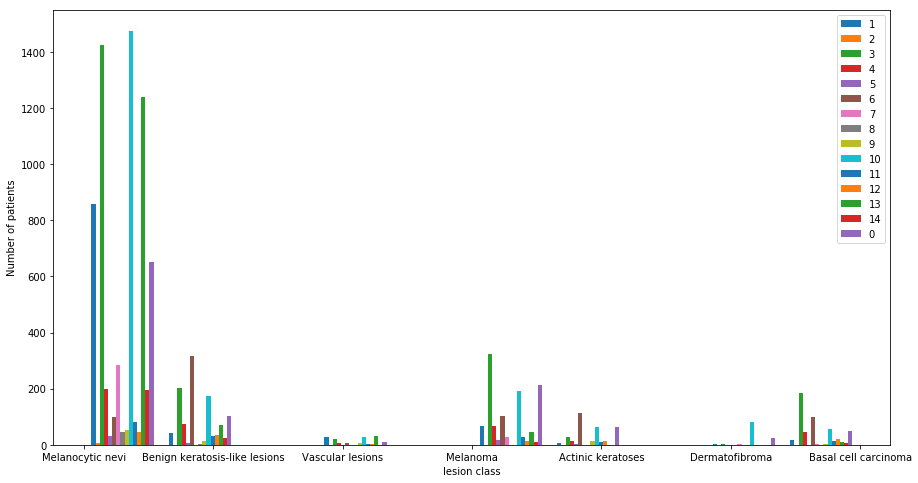

In [30]:
figure = plt.figure(figsize=(15,8))
plt.hist([
          tile_df[tile_df['localization']==0 ]['cell_type'],
         tile_df[tile_df['localization']== 1 ]['cell_type'],
         tile_df[tile_df['localization']== 2]['cell_type'],
         tile_df[tile_df['localization']== 3]['cell_type'], 
         tile_df[tile_df['localization']== 4]['cell_type'], 
         tile_df[tile_df['localization']== 5]['cell_type'], 
         tile_df[tile_df['localization']== 6]['cell_type'], 
         tile_df[tile_df['localization']== 7]['cell_type'], 
         tile_df[tile_df['localization']== 8]['cell_type'], 
         tile_df[tile_df['localization']== 9]['cell_type'], 
         tile_df[tile_df['localization']== 10]['cell_type'], 
         tile_df[tile_df['localization']== 11]['cell_type'], 
         tile_df[tile_df['localization']== 12]['cell_type'], 
         tile_df[tile_df['localization']== 13]['cell_type'], 
         tile_df[tile_df['localization']== 14]['cell_type']],  
         bins = 10,label = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '0'])
plt.xlabel('lesion class')
plt.ylabel('Number of patients')
plt.legend()

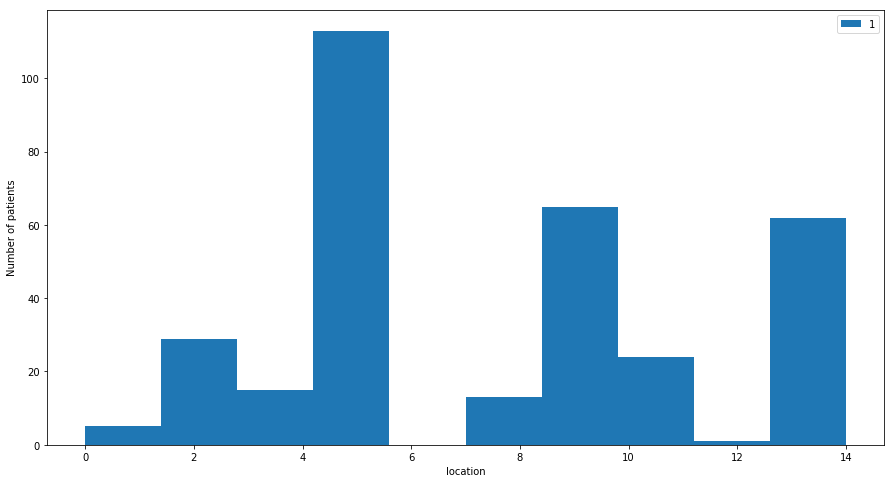

In [40]:
figure = plt.figure(figsize=(15,8))
plt.hist([
         tile_df[tile_df['cell_type']=='Actinic keratoses']['localization']], 
         bins = 10,label = ['1','2', '3', '4', '5', '6', '7'])
plt.xlabel('location')
plt.ylabel('Number of patients')
plt.legend()

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

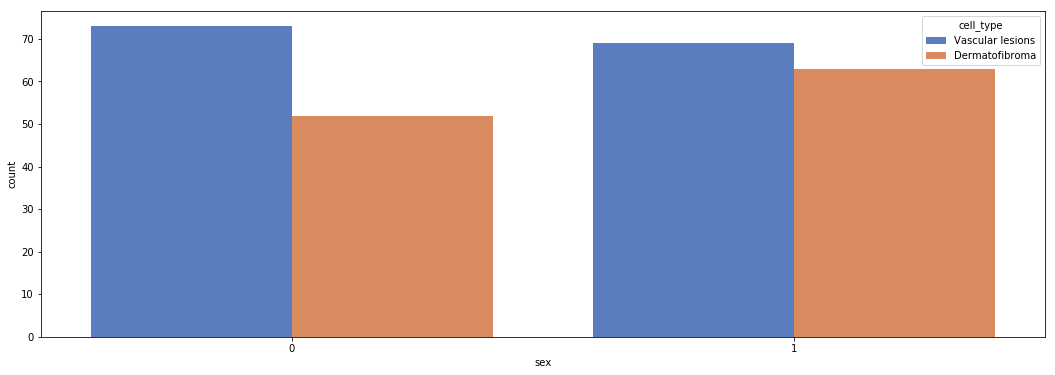

In [106]:
a4_dims = (18, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(ax=ax, x='sex', hue='cell_type', data=tile_df[(tile_df['cell_type']=='Vascular lesions') | (tile_df['cell_type']=='Dermatofibroma')], palette="muted")

In [103]:
​tile_df['cell_type'].value_counts()tile_df['cell_type'].value_counts()

Melanocytic nevi                 6695
Melanoma                         1111
Benign keratosis-like lesions    1098
Basal cell carcinoma              513
Actinic keratoses                 326
Vascular lesions                  142
Dermatofibroma                    115
Name: cell_type, dtype: int64

,age,sex,cell_type_idx,localization_code
age,1.000000,0.162909,-0.291496,-0.015329
sex,0.162909,1.000000,-0.046098,-0.040353
cell_type_idx,-0.291496,-0.046098,1.000000,0.028431
localization_code,-0.015329,-0.040353,0.028431,1.000000


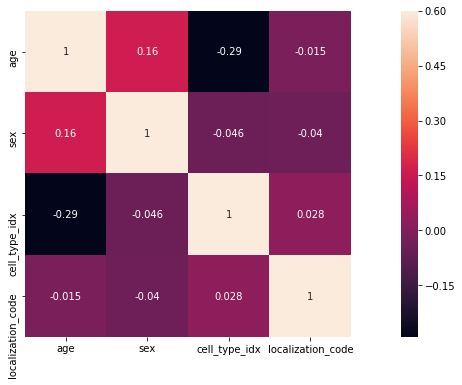

In [120]:
a4_dims = (18, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(plot_df.corr(), vmax=0.6, square=True, annot=True)
plot_df.corr()


In [121]:
tile_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,localization_code
3119,HAM_0000797,ISIC_0026039,nv,follow_up,50.0,0,lower extremity,Melanocytic nevi,4,9
7863,HAM_0002502,ISIC_0033425,nv,histo,40.0,1,abdomen,Melanocytic nevi,4,0
6038,HAM_0005999,ISIC_0030958,nv,follow_up,50.0,0,foot,Melanocytic nevi,4,6
7737,HAM_0005513,ISIC_0033214,nv,histo,5.0,0,back,Melanocytic nevi,4,2
5917,HAM_0006576,ISIC_0024606,nv,follow_up,65.0,1,abdomen,Melanocytic nevi,4,0
